<center>
    <h1> What are the most popular themes in Science Fiction? </h1>
    <h3> Philosophy of Science Fiction - March 2020 <br>
         Thomas de Mareuil - DSB </h3>
</center>

As part of the Philosophy of Science Fiction course (HFC569) taught by J. Degenève at Ecole Polytechnique, I tried to conduct a short statistical analysis in order to identify the most common themes in science-fiction books.

The _Sci-Fi Books data set_ that I used was collected by Dr. Kathleen M. Carley in 2017, and is available for download from the [CASOS website](http://www.casos.cs.cmu.edu/tools/datasets/internal/index.php). The dataset contains information about a sample of 157 science-fiction books written over the past 3 centuries and listed among the most popular of the genre. Information includes date, author, popoularity index (number of lists of top N science fiction books that these appeared in circa 2016) and content of the story. For content, each book was read by 2 people, which then graded 11 possible themes (robots, time travel, psychic powers, post-apocalyptic, etc.) on a scale from 0 (theme not present at all in the story) to 3 (theme present, strong and integral to the story). I built this analysis on top of an online article by Zarrina Niyazova, available on [towardsdatascience.com](https://towardsdatascience.com/which-content-of-the-story-is-the-most-popular-in-top-rated-sci-fi-books-6f3644246ac3).

Let's now dive into the data to see what are the most common themes in popular SF books, and how these have evolved over time!

### Most popular themes

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') # 'once' is possible as well

In [90]:
data = pd.read_excel("Sci-Fi Books.xlsx")
data.rename(columns = {'robots, androids or AI computers':'robots, androids, AI', 'novel technology (not Aiish)':'new tech', 'After Catastrophe':'post-apocalypse', 'multi-species':'alien life'}, inplace=True)
print("There are {} books and {} features for each in the dataset.".format(data.shape[0], data.shape[1]))
data.head(8)

There are 157 books and 18 features for each in the dataset.


,Book,Frequency,date,author,century,quarter century,author gender,"robots, androids, AI",battles,romance,magic,time travel,interplanetary,alien life,beasts,psychic powers,new tech,post-apocalypse
0,Frankenstein,6,1818,Mary Shelley,1,1,2,1,1,3,0,0,0,0,0,0,3,0
1,Twenty Thousand Leagues Under the Sea,7,1870,Jules Vernes,1,3,1,0,1,1,0,0,0,0,2,0,3,0
2,Journey to the Center of the Earth,2,1874,Jules Verne,1,3,1,0,2,2,0,0,0,0,3,0,0,0
3,The Time Machine,6,1895,H. G. Wells,1,4,1,0,2,3,0,3,0,0,3,1,3,1
4,The War of the Worlds,3,1898,H. G. Wells,1,4,1,0,3,1,0,0,2,3,0,1,0,0
5,Princess of Mars,2,1917,Edgar Rice Burroughs,2,5,1,0,3,3,2,0,2,3,2,2,3,1
6,The Skylark of Space,2,1919,E E Doc Smith,2,5,1,0,1,2,0,0,3,3,0,0,3,0
7,Last and First Men,3,1930,Olaf Stapledon,2,6,1,2,2,0,0,0,0,3,0,2,2,0


The most famous authors in the dataset (frequency in top sci-fi books list superior to 5) are: 

In [93]:
index_famous = data[ data['Frequency'] <= 5 ].index
data_f = data.drop(index_famous)
data_f.author.unique()

array(['Mary Shelley', 'Jules Vernes', 'H. G. Wells', 'Aldous Huxley',
       'Isaac Asimov', 'George Orwell', 'Ray Bradbury', 'Alfred Bester',
       'Walter M. Miller Jr', 'Frank Herbert', 'Robert A. Heinlein',
       'Arthur C. Clarke', 'Kurt Vonnegut', 'Ursula K. Le Guin',
       'Larry Nivan', 'Joe Haldeman', 'Samuel R. Delany', 'Douglas Adams',
       'William Gibson', 'Margaret Atwood', 'Orson Scott Card',
       'Dan Simmons', 'Connie Willis', 'Kim Stanley Robinson',
       'Neal Stephenson', 'Vernor Vinge', 'Robert Zemeckis',
       'Paolo Bacigalupi'], dtype=object)

In [51]:
data.sort_values(by=['Frequency'], ascending = False).head(8)

,Book,Frequency,date,author,century,quarter century,author gender,"robots, androids, AI",battles,romance,magic,time travel,interplanetary,alien life,beasts,psychic powers,new tech,post-apocalypse
79,The Hitchhiker's Guide to the Galaxy,11,1979,Douglas Adams,2,8,1,1,0,1,0,0,3,3,0,0,2,1
85,Neuromancer,10,1984,William Gibson,2,8,1,3,1,1,1,0,0,0,0,0,3,0
46,The Dune Chronicles,9,1965,Frank Herbert,2,7,1,0,2,2,0,0,3,0,2,0,3,0
11,The Foundation Trilogy,8,1942,Isaac Asimov,2,6,1,3,2,1,0,0,3,0,0,1,3,0
70,The Forever War,8,1974,Joe Haldeman,2,7,1,2,3,1,0,0,3,0,0,0,3,2
62,Ringworld,8,1970,Larry Nivan,2,7,1,2,1,0,0,0,3,1,0,0,3,1
52,2001: A Space Odyssey,7,1968,Arthur C. Clarke,2,7,1,3,0,0,0,0,2,1,0,0,3,0
89,Ender's Game,7,1985,Orson Scott Card,2,8,1,1,3,0,0,0,2,2,0,0,2,0


#### General

In [52]:
# Most frequent content as Series

content = data[data.columns[-11:]]
content_total = content.sum()
content_total

robots, androids, AI     95
battles                 175
romance                 137
magic                    80
time travel              39
interplanetary          149
alien life              121
beasts                   62
psychic powers           55
new tech                258
post-apocalypse          94
dtype: int64

In [53]:
# Most frequent content as Dataframe

df = pd.DataFrame(content.sum())
df.reset_index(inplace=True)
df.rename(columns = {df.columns[0]:'content', df.columns[1]:'sum'}, inplace=True)
#df.sort_values(by=['sum'], ascending=False, inplace = True, ignore_index=True)
df

,content,sum
0,"robots, androids, AI",95
1,battles,175
2,romance,137
3,magic,80
4,time travel,39
5,interplanetary,149
6,alien life,121
7,beasts,62
8,psychic powers,55
9,new tech,258


In [54]:
# Pie plot with matplotlib

#plt.figure(figsize=(7,7))
#plt.pie(df['sum'],labels=df['content'],autopct='%1.0f%%')
#plt.title('My Title')
#plt.axis('equal', edgecolor='white')
#plt.show()

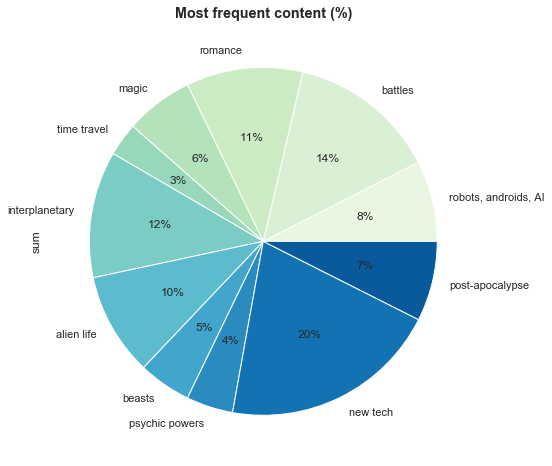

In [101]:
# Pie plot with seaborn

#df['sum'] = df['sum'].astype(int)
#df['sum'] = pd.to_numeric(df['sum'])

sns.set()
sns.set_palette("GnBu",11)
df['sum'].plot(kind='pie', labels=df['content'], figsize=[8,8],
          autopct=lambda p: '{:.0f}%'.format(p))
plt.title('Most frequent content (%)', fontsize='large', fontweight='semibold')
plt.show()

Bubble plot

In [56]:
# compute most common themes when only keeping ==3

topthemes = data[data.columns[-16:]]
topthemes.drop(columns = ['author', 'author gender', 'century', 'quarter century','date'], inplace=True)
topthemes[topthemes < 3] = 0 # keep only the most relevant theme per row
topthemes[topthemes == 3] = 1 # set it to 1 to count
topthemes = pd.DataFrame(topthemes.sum())
topthemes.reset_index(inplace=True)
topthemes.rename(columns = {topthemes.columns[0]:'content', topthemes.columns[1]:'sum'}, inplace=True)

top_themes = pd.merge(df, topthemes, on='content')
top_themes['y_percentage'] = top_themes['sum_y']/data.shape[0]*100
top_themes['y_percentage'] = top_themes['y_percentage'].astype(int).astype(str) + '%'
top_themes

/Users/Thomas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,content,sum_x,sum_y,y_percentage
0,"robots, androids, AI",95,18,11%
1,battles,175,27,17%
2,romance,137,18,11%
3,magic,80,19,12%
4,time travel,39,11,7%
5,interplanetary,149,30,19%
6,alien life,121,26,16%
7,beasts,62,11,7%
8,psychic powers,55,5,3%
9,new tech,258,62,39%


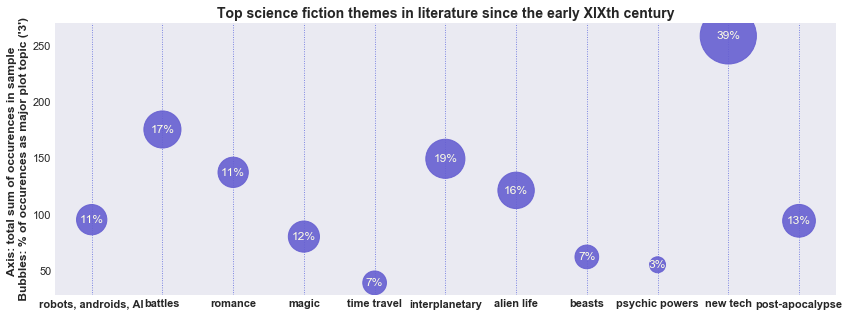

In [57]:
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize=(14,5))
xrange = range(len(top_themes['content']))
# equivalent to np.arange(len(top_themes['content']))
# and to range(0,top_themes.shape[0])

plt.scatter(x=xrange, y=top_themes['sum_x'], s=top_themes['sum_y']*51,
            c='xkcd:dark periwinkle', alpha=0.9)
# equivalent to ax = sns.scatterplot(same)

plt.xticks(np.arange(0, 11, step=1))
ax.set_xticklabels(top_themes['content'], fontweight='semibold')
plt.ylabel("Axis: total sum of occurences in sample \n Bubbles: % of occurences as major plot topic ('3')", fontweight='semibold')
plt.title('Top science fiction themes in literature since the early XIXth century', fontweight='bold', fontsize = '14')
plt.grid(True, axis = 'x', color='xkcd:warm blue', linestyle=':', linewidth=0.9, alpha=0.8)

for line in range(0,top_themes.shape[0]):
     ax.text(xrange[line], top_themes.sum_x[line]-2.2, top_themes.y_percentage[line], 
             horizontalalignment='center', size='medium', color='xkcd:off white', weight='normal')
# works as well with top_themes.sum_x.iloc[line] and top_themes.sum_y.iloc[line]

plt.show()

#### Men vs. women authors

In [58]:
# Most frequent content for women authors

data_women = data[data.columns[-12:]]
index_men = data_women[ data_women['author gender'] == 1 ].index
data_women.drop(index_men, inplace=True)
data_women.drop(columns = ['author gender'], inplace=True)
content_women = data_women.sum()

content_women = pd.DataFrame(content_women)
content_women.reset_index(inplace=True)
content_women.rename(columns = {content_women.columns[0]:'content', content_women.columns[1]:'sum'}, inplace=True)

content_women['occurences'] = [x for x in data_women.astype(bool).sum(axis=0)] # count non-zeros in columns
content_women['percentage'] = content_women['occurences']/data_women.shape[0]*100
content_women['percentage'] = content_women['percentage'].astype(int)
# to add the % symbol, add at the end of previous line: .astype(str) + '%'
content_women

/Users/Thomas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,content,sum,occurences,percentage
0,"robots, androids, AI",6,4,12
1,battles,29,21,63
2,romance,37,19,57
3,magic,18,7,21
4,time travel,16,6,18
5,interplanetary,20,8,24
6,alien life,9,4,12
7,beasts,12,5,15
8,psychic powers,11,8,24
9,new tech,40,14,42


In [59]:
labels = data_women.sum().keys() # or: labels=content_women['content'].values
stats = content_women['percentage'].values # .values needed to have it as array and not df

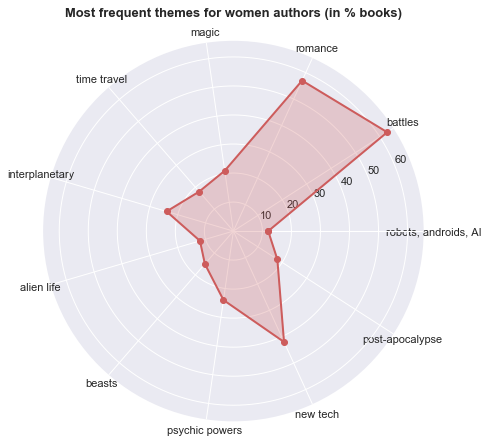

In [60]:
def spiderplot(labels, stats):
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, color='indianred')
    ax.fill(angles, stats, alpha=0.25, color = 'indianred')
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Most frequent themes for women authors (in % books)', fontweight="bold", fontsize = '13')
    ax.grid(True)
    return ax

spiderplot(labels, stats)
plt.show()

In [61]:
# Most frequent content for men authors

data_men = data[data.columns[-12:]]
index_women = data_men[ data_men['author gender'] == 2 ].index
data_men.drop(index_women, inplace=True)
data_men.drop(columns = ['author gender'], inplace=True)
content_men = data_men.sum()

content_men = pd.DataFrame(content_men)
content_men.reset_index(inplace=True)
content_men.rename(columns = {content_men.columns[0]:'content', content_men.columns[1]:'sum'}, inplace=True)

content_men['occurences'] = [x for x in data_men.astype(bool).sum(axis=0)] # count non-zeros in columns
content_men['percentage'] = content_men['occurences']/data_men.shape[0]*100
content_men['percentage'] = content_men['percentage'].astype(int)
# to add the % symbol, add at the end of previous line: .astype(str) + '%'
content_men

,content,sum,occurences,percentage
0,"robots, androids, AI",89,46,37
1,battles,146,80,64
2,romance,100,64,51
3,magic,62,26,20
4,time travel,23,9,7
5,interplanetary,129,59,47
6,alien life,112,52,41
7,beasts,50,25,20
8,psychic powers,44,26,20
9,new tech,218,89,71


In [62]:
labels = data_men.sum().keys() # or: labels=content_men['content'].values
stats = content_men['percentage'].values # .values needed to have it as array and not df

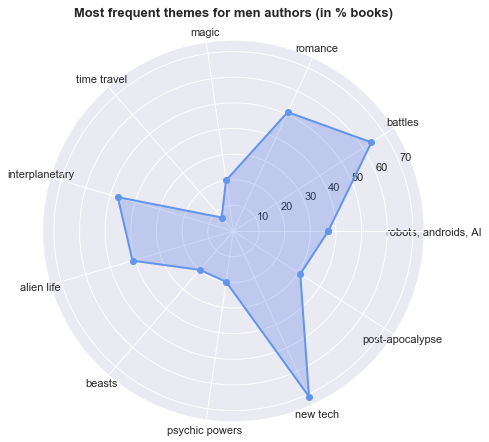

In [63]:
def spiderplot(labels, stats):
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, color='cornflowerblue')
    ax.fill(angles, stats, alpha=0.25, color = 'royalblue')
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Most frequent themes for men authors (in % books)', fontweight="bold", fontsize = 13)
    ax.grid(True)
    return ax

spiderplot(labels, stats)
plt.show()

#### Before vs. after 1980

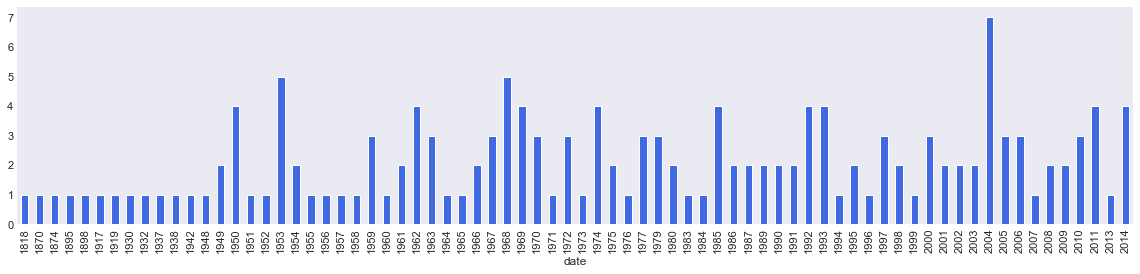

In [64]:
# plot historical repartition of books in the dataset
data.groupby('date')['Book'].nunique().plot(kind='bar', color='royalblue', figsize=(20,4))
plt.show()

In [65]:
# Most frequent content before 1980

content_old = data[data.columns[-16:]]
index_new = content_old[ content_old['date'] >= 1980 ].index
content_old.drop(index_new, inplace=True)
content_old.drop(columns = ['author', 'date', 'author gender', 'century', 'quarter century'], inplace=True)
number_old = content_old.shape[0]
#[content_old[x].nunique() for x in content_old.columns]
content_old = content_old.astype(bool).sum(axis=0) # count non-zeros in columns

df_old = pd.DataFrame(content_old)
df_old.reset_index(inplace=True)
df_old.rename(columns = {df_old.columns[0]:'content', df_old.columns[1]:'sum'}, inplace=True)
df_old['%'] = df_old['sum']/number_old*100
df_old = df_old.round(0)
df_old.sort_values(by=['sum'], ascending=True, inplace = True)
df_old

,content,sum,%
4,time travel,10,12.0
3,magic,17,21.0
7,beasts,18,22.0
8,psychic powers,21,26.0
0,"robots, androids, AI",25,30.0
10,post-apocalypse,28,34.0
6,alien life,32,39.0
5,interplanetary,41,50.0
2,romance,45,55.0
9,new tech,53,65.0


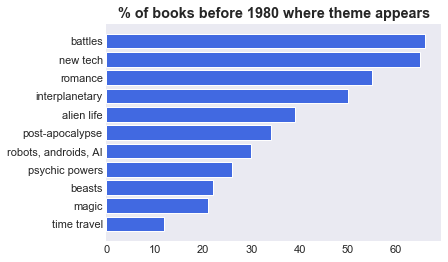

In [66]:
plt.barh(df_old['content'], df_old['%'], color='royalblue')
plt.title('% of books before 1980 where theme appears', fontweight="bold", fontsize = 'large')
plt.show()

In [67]:
# Most frequent content after 1980

content_new = data[data.columns[-16:]]
index_old = content_new[ content_new['date'] < 1980 ].index
content_new.drop(index_old, inplace=True)
content_new.drop(columns = ['author', 'date', 'author gender', 'century', 'quarter century'], inplace=True)
number_new = content_new.shape[0]
content_new = content_new.astype(bool).sum(axis=0) # count non-zeros in columns

df_new = pd.DataFrame(content_new)
df_new.reset_index(inplace=True)
df_new.rename(columns = {df_new.columns[0]:'content', df_new.columns[1]:'sum'}, inplace=True)
df_new['%'] = df_new['sum']/number_new*100
df_new = df_new.round(0)
df_new.sort_values(by=['sum'], ascending=True, inplace = True)
df_new

,content,sum,%
4,time travel,5,7.0
7,beasts,12,16.0
8,psychic powers,13,17.0
3,magic,16,21.0
10,post-apocalypse,17,23.0
6,alien life,24,32.0
0,"robots, androids, AI",25,33.0
5,interplanetary,26,35.0
2,romance,38,51.0
1,battles,47,63.0


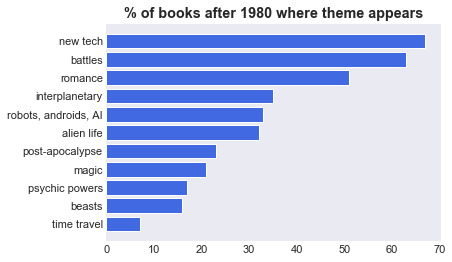

In [68]:
plt.barh(df_new['content'], df_new['%'], color='royalblue')
plt.title('% of books after 1980 where theme appears', fontweight="bold", fontsize = 'large')
plt.show()

#### WordCloud

In [69]:
# create corpus of text to be used in WordCloud

corpus = (['robots'] + ['androids'] + ['AI'])*95 + ['new tech']*258 + ['post-apocalypse']*94 + ['battles'] * 175 + ['romance'] * 137 + ['magic'] * 80 + ['time travel'] * 39 + ['interplanetary'] * 149 + ['multi-species'] * 121 + ['beasts'] * 62 + ['psychic powers'] * 55
import random
random.shuffle(corpus)
corpus = str(corpus)
corpus = corpus.replace("'", "")
corpus

'[interplanetary, new tech, interplanetary, battles, interplanetary, magic, multi-species, romance, battles, androids, interplanetary, romance, romance, battles, beasts, romance, beasts, interplanetary, interplanetary, new tech, new tech, new tech, new tech, battles, new tech, new tech, romance, interplanetary, AI, robots, magic, new tech, new tech, new tech, AI, new tech, new tech, multi-species, AI, interplanetary, AI, interplanetary, androids, beasts, battles, romance, time travel, multi-species, magic, psychic powers, multi-species, new tech, battles, multi-species, romance, new tech, robots, romance, multi-species, battles, psychic powers, interplanetary, multi-species, post-apocalypse, AI, androids, battles, robots, androids, multi-species, new tech, post-apocalypse, battles, multi-species, romance, AI, new tech, new tech, magic, androids, new tech, AI, new tech, romance, AI, romance, battles, post-apocalypse, AI, interplanetary, romance, post-apocalypse, battles, post-apocalypse

In [70]:
# 1-line method with list comprehension
corpus2 = (((df['content'] + ', ') * [x for x in df['sum']])).sum()

In [71]:
# if we want to split the long string in corpus2 and convert to DataFrame:
corpus2 = corpus2.split(', ')
corpus2 = pd.DataFrame(corpus2, columns=['corpus'])
corpus2

,corpus
0,robots
1,androids
2,AI
3,robots
4,androids
...,...
1451,post-apocalypse
1452,post-apocalypse
1453,post-apocalypse
1454,post-apocalypse


In [72]:
# extract content from Series with for loop
l=[]
m = []
for index, row in df.iterrows():
    l.append(row['sum'])
print(l)
for content in df['content']:
    m.append(content)
print(m)

[95, 175, 137, 80, 39, 149, 121, 62, 55, 258, 94]
['robots, androids, AI', 'battles', 'romance', 'magic', 'time travel', 'interplanetary', 'alien life', 'beasts', 'psychic powers', 'new tech', 'post-apocalypse']


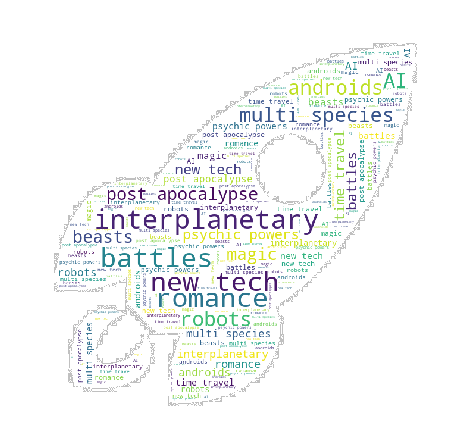

In [73]:
# plot and style Word Cloud

from wordcloud import WordCloud
from PIL import Image

rocket = np.array(Image.open('/Users/Thomas/Documents/Data Science X/Cours/Humanities/Philosophy of Science Fiction/rocket-icon-rocket-symbol-pictogram-isolated-icon-vector-23251943.jpg'))

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='white',
        mask=rocket,
        max_font_size=45,
        min_font_size = 5,
        contour_width = 0.1,
        contour_color = 'silver',
        repeat=True,
        random_state=1).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### Most commonly associated themes

/Users/Thomas/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


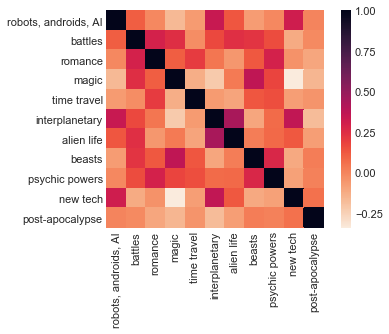

In [74]:
corr = data[data.columns[-11:]]
corr = corr.corr()
cmap = sns.cm.rocket_r
sns.heatmap(corr, cmap=cmap, square=True)
plt.show()

In [75]:
# create a dictionary with for each theme the nb of occurences of other themes

content = data[data.columns[-11:]]
dict_contents = {}

for col in content.columns:
    # first build a table with only rows for which col isn't null
    content = data[data.columns[-11:]]
    index = content[ content[col] == 0 ].index
    content.drop(index, inplace=True)
    content.drop(columns=[col], inplace=True)
    # then count the nb of each mark in the remaining columns
    dict_col = {remaining_col: content[remaining_col].value_counts().to_dict() for remaining_col in content.columns}
    # add to dict_contents
    dict_contents[col] = dict_col

dict_contents

{'robots, androids, AI': {'battles': {1: 14, 0: 14, 3: 12, 2: 10},
  'romance': {0: 22, 1: 19, 3: 5, 2: 4},
  'magic': {0: 44, 3: 4, 2: 1, 1: 1},
  'time travel': {0: 47, 3: 3},
  'interplanetary': {3: 20, 0: 16, 2: 8, 1: 6},
  'alien life': {0: 23, 3: 13, 1: 9, 2: 5},
  'beasts': {0: 41, 1: 5, 2: 3, 3: 1},
  'psychic powers': {0: 39, 1: 5, 2: 4, 3: 2},
  'new tech': {3: 23, 2: 16, 0: 6, 1: 5},
  'post-apocalypse': {0: 35, 1: 7, 3: 6, 2: 2}},
 'battles': {'robots, androids, AI': {0: 65, 1: 17, 3: 11, 2: 8},
  'romance': {0: 46, 1: 30, 3: 14, 2: 11},
  'magic': {0: 72, 3: 17, 2: 8, 1: 4},
  'time travel': {0: 93, 3: 6, 1: 2},
  'interplanetary': {0: 58, 3: 22, 2: 17, 1: 4},
  'alien life': {0: 60, 3: 21, 2: 10, 1: 10},
  'beasts': {0: 77, 3: 10, 2: 9, 1: 5},
  'psychic powers': {0: 76, 1: 16, 2: 6, 3: 3},
  'new tech': {0: 36, 3: 35, 2: 21, 1: 9},
  'post-apocalypse': {0: 71, 3: 14, 1: 10, 2: 6}},
 'romance': {'robots, androids, AI': {0: 55, 1: 13, 3: 10, 2: 5},
  'battles': {0: 28, 1: 

In [76]:
# create a dictionary with for each theme the total nb of occurences of other themes

content = data[data.columns[-11:]]
dict_contents = {}

for col in content.columns:
    
    # first build a table with only rows for which col isn't null
    content = data[data.columns[-11:]]
    index = content[ content[col] == 0 ].index
    content.drop(index, inplace=True)
    content[col].values[:] = 0 # make sure to keep col, but with 0s only (for graph)
    
    # then count the sum of marks in each of the the remaining columns
    dict_col = [content[remaining_col].sum() for remaining_col in content.columns]
    # to keep the key name: dict_col = {k: v/sum(dict_col.values())*100 for k, v in dict_col.items()}

    # compute the percentage this count represents
    dict_col = dict_col/sum(dict_col)
    
    # add to dict_contents
    dict_contents[col] = dict_col

dict_contents

{'robots, androids, AI': array([0.        , 0.15765766, 0.09459459, 0.03378378, 0.02027027,
        0.18468468, 0.13063063, 0.03153153, 0.04279279, 0.23873874,
        0.06531532]),
 'battles': array([0.08707124, 0.        , 0.12401055, 0.09366755, 0.02638522,
        0.13720317, 0.12269129, 0.06992084, 0.04881266, 0.20580475,
        0.08443272]),
 'romance': array([0.08191654, 0.16692427, 0.        , 0.07418856, 0.03863988,
        0.13137558, 0.0927357 , 0.05873261, 0.06800618, 0.2179289 ,
        0.06955178]),
 'magic': array([0.0387931 , 0.23275862, 0.16810345, 0.        , 0.00431034,
        0.06034483, 0.11206897, 0.13793103, 0.0862069 , 0.12068966,
        0.0387931 ]),
 'time travel': array([0.04587156, 0.14678899, 0.19266055, 0.02752294, 0.        ,
        0.09174312, 0.05504587, 0.11009174, 0.10091743, 0.17431193,
        0.05504587]),
 'interplanetary': array([0.12204007, 0.14936248, 0.11111111, 0.02367942, 0.02367942,
        0.        , 0.15846995, 0.03278689, 0.05282332

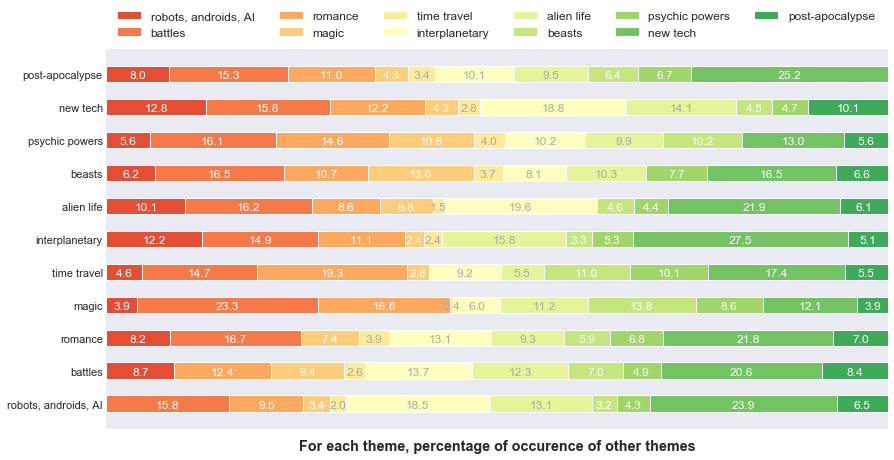

In [77]:
# display as horizontal bar chart

category_names = dict_contents.keys()
labels = list(dict_contents.keys())
data = np.array(list(dict_contents.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(14, 7))
#ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        # next 4 lines added to avoid showing a 0.0 label for row theme
        cbis = y+c
        c = round(c*100, ndigits=1)
        if (cbis).is_integer():
            c=""
        ax.text(x, y-0.03, str(c), ha='center', va='center', color=text_color)

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium')
plt.title('For each theme, percentage of occurence of other themes',
          fontweight="semibold", fontsize = 'large', y=-0.07)
plt.show()

### Most highly rated content

In [78]:
data = pd.read_excel("Sci-Fi Books.xlsx")
data.rename(columns = {'robots, androids or AI computers':'robots, androids, AI', 'novel technology (not Aiish)':'new tech', 'After Catastrophe':'post-apocalypse', 'multi-species':'alien life'}, inplace=True)

data.sort_values(by=['Frequency'], ascending = False).head(8)

/Users/Thomas/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,Book,Frequency,date,author,century,quarter century,author gender,"robots, androids, AI",battles,romance,magic,time travel,interplanetary,alien life,beasts,psychic powers,new tech,post-apocalypse
79,The Hitchhiker's Guide to the Galaxy,11,1979,Douglas Adams,2,8,1,1,0,1,0,0,3,3,0,0,2,1
85,Neuromancer,10,1984,William Gibson,2,8,1,3,1,1,1,0,0,0,0,0,3,0
46,The Dune Chronicles,9,1965,Frank Herbert,2,7,1,0,2,2,0,0,3,0,2,0,3,0
11,The Foundation Trilogy,8,1942,Isaac Asimov,2,6,1,3,2,1,0,0,3,0,0,1,3,0
70,The Forever War,8,1974,Joe Haldeman,2,7,1,2,3,1,0,0,3,0,0,0,3,2
62,Ringworld,8,1970,Larry Nivan,2,7,1,2,1,0,0,0,3,1,0,0,3,1
52,2001: A Space Odyssey,7,1968,Arthur C. Clarke,2,7,1,3,0,0,0,0,2,1,0,0,3,0
89,Ender's Game,7,1985,Orson Scott Card,2,8,1,1,3,0,0,0,2,2,0,0,2,0


In [79]:
content = data[data.columns[-17:]]
content.drop(columns = ['author', 'author gender', 'century', 'quarter century','date'], inplace=True)

# group by frequency
content = content.set_index(['Frequency'])
content = content.groupby(content.index).sum()
content = content.reset_index()

# create 3 frequency groups
content = content.groupby(content.index // 3).sum()
content.iloc[2] += content.iloc[3]
content.drop([3], axis=0, inplace=True)
content.Frequency[0]='1-4'
content.Frequency[1]='5-7'
content.Frequency[2]='8-11'
content.set_index('Frequency', inplace = True)

# compute percentages in rows
content = content.apply(lambda x: x/x.sum(), axis=1)
content

/Users/Thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"robots, androids, AI",battles,romance,magic,time travel,interplanetary,alien life,beasts,psychic powers,new tech,post-apocalypse
Frequency,,,,,,,,,,,
1-4,0.059511,0.139214,0.109458,0.083953,0.029756,0.100956,0.098831,0.057386,0.051010,0.197662,0.072264
5-7,0.110236,0.137795,0.110236,0.000000,0.043307,0.153543,0.094488,0.023622,0.023622,0.216535,0.086614
8-11,0.157143,0.128571,0.085714,0.014286,0.000000,0.214286,0.057143,0.028571,0.014286,0.242857,0.057143


In [80]:
np.asarray(content)

array([[0.05951116, 0.1392136 , 0.10945802, 0.08395324, 0.02975558,
        0.10095643, 0.09883103, 0.05738576, 0.05100956, 0.19766206,
        0.07226355],
       [0.11023622, 0.13779528, 0.11023622, 0.        , 0.04330709,
        0.15354331, 0.09448819, 0.02362205, 0.02362205, 0.21653543,
        0.08661417],
       [0.15714286, 0.12857143, 0.08571429, 0.01428571, 0.        ,
        0.21428571, 0.05714286, 0.02857143, 0.01428571, 0.24285714,
        0.05714286]])

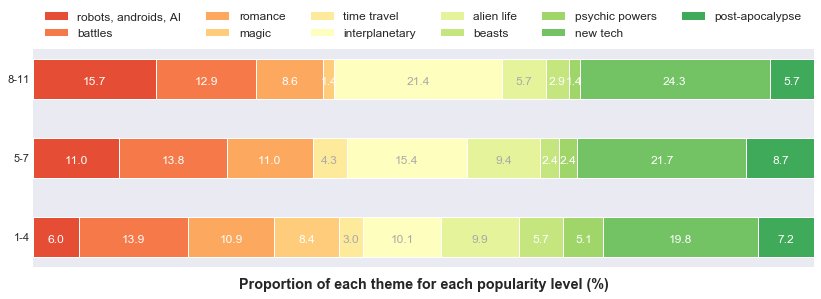

In [81]:
# display as horizontal bar chart

category_names = list(content.columns)
labels = list(content.index)
data = np.asarray(content)
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(14, 4))
#ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        # next 4 lines added to avoid showing a 0.0 label for row theme
        cbis = y+c
        c = round(c*100, ndigits=1)
        if (cbis).is_integer():
            c=""
        ax.text(x, y-0.03, str(c), ha='center', va='center', color=text_color)

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium')
plt.title('Proportion of each theme for each popularity level (%)', fontweight="semibold", fontsize = 'large', y=-0.13)
plt.show()

### Evolution of themes over time

In [82]:
# preprocess content table

data = pd.read_excel("Sci-Fi Books.xlsx")
data.rename(columns = {'robots, androids or AI computers':'robots, androids, AI', 'novel technology (not Aiish)':'new tech', 'After Catastrophe':'post-apocalypse', 'multi-species':'alien life'}, inplace=True)

content = data[data.columns[-16:]]
content.drop(columns = ['author', 'author gender', 'century', 'quarter century'], inplace=True)
content[content < 3] = 0 # keep only the most relevant theme per row
content[content == 3] = 1 # set it to 1 to count
content = content.set_index(['date'])
content = content.groupby(content.index // 10*10).sum() # group by decade
content = content.reset_index()

content['date2'] = content['date']+9 # this line and next ones add end of decade indication
content['date'] = content['date'].astype(str)
content['date2'] = content['date2'].astype(str)
content['period'] = content[['date', 'date2']].agg('-'.join, axis=1)
content.drop(columns = ['date','date2'], inplace = True)

content = content.set_index(['period'])
content = content.div(content.sum(1), axis=0) # replace values with % in row

x = ['1810-1819', '1820-1829', '1830-1839', '1840-1849', '1850-1859', '1860-1869', '1870-1879', '1890-1899', '1910-1919', '1920-1929',
       '1930-1939','1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
       '1990-1999', '2000-2009', '2010-2019']
x = pd.DataFrame(x,columns=['full_date'])
x = x.set_index(['full_date'])

content2 = content.merge(x, left_index=True, right_index=True, how='outer')
content2.interpolate(method='linear', limit=None, limit_direction='both', inplace = True)
content2 = content2.transpose()
content2

/Users/Thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1810-1819,1820-1829,1830-1839,1840-1849,1850-1859,1860-1869,1870-1879,1890-1899,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
"robots, androids, AI",0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.076923,0.108696,0.000000,0.090909,0.071429,0.100,0.083333
battles,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.166667,0.142857,0.071429,0.0,0.142857,0.115385,0.065217,0.142857,0.181818,0.119048,0.050,0.166667
romance,0.5,0.416667,0.333333,0.25,0.166667,0.083333,0.0,0.166667,0.142857,0.071429,0.0,0.000000,0.038462,0.065217,0.085714,0.045455,0.071429,0.100,0.000000
magic,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.115385,0.065217,0.114286,0.090909,0.071429,0.050,0.166667
time travel,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.038462,0.086957,0.028571,0.000000,0.047619,0.025,0.083333
interplanetary,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.142857,0.071429,0.0,0.285714,0.076923,0.152174,0.171429,0.090909,0.095238,0.125,0.083333
alien life,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.166667,0.285714,0.642857,1.0,0.000000,0.115385,0.043478,0.142857,0.227273,0.095238,0.075,0.000000
beasts,0.0,0.083333,0.166667,0.25,0.333333,0.416667,0.5,0.166667,0.000000,0.000000,0.0,0.000000,0.076923,0.065217,0.000000,0.000000,0.071429,0.025,0.000000
psychic powers,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.057143,0.045455,0.000000,0.000,0.000000
new tech,0.5,0.500000,0.500000,0.50,0.500000,0.500000,0.5,0.166667,0.285714,0.142857,0.0,0.285714,0.153846,0.239130,0.171429,0.181818,0.309524,0.350,0.250000


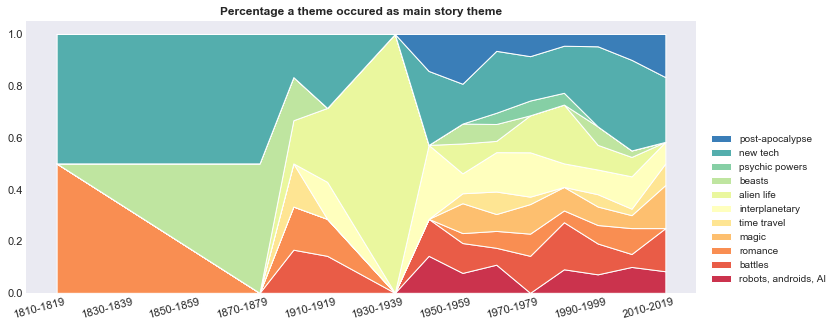

In [83]:
# plot and style stackplot

labels = np.asarray(content2.index)
xticks = ['1810-1819', '1830-1839', '1850-1859', '1870-1879', '1910-1919',
       '1930-1939', '1950-1959', '1970-1979', '1990-1999', '2010-2019']

plt.style.use('seaborn-dark')
#sns.set(style="white")
sns.set_palette("Spectral",11)
fig, ax = plt.subplots(figsize=(12,5))
ax.stackplot(range(1,20), content2, labels = labels)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower left', bbox_to_anchor= (1.01,0.0), fontsize='small')
plt.xticks(np.arange(0.5, 19.5, step=2), xticks, rotation=15)
plt.title('Percentage a theme occured as main story theme', fontweight="bold", fontsize = 'medium')
plt.show()

/Users/Thomas/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


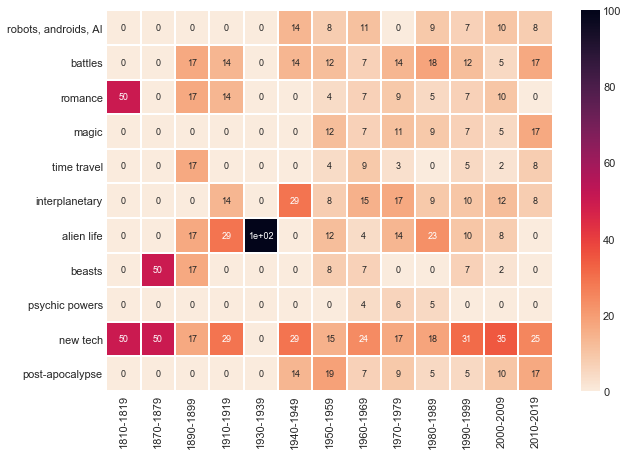

In [84]:
content3 = content*100
content3 = content3.round(0).transpose()
cmap = sns.cm.rocket_r
plt.figure(figsize=(10,7))
sns.heatmap(content3, annot=True, annot_kws={"size": 9}, linewidths=1, linecolor='white', cmap=cmap)
plt.xlabel("")
plt.show()